<a href="https://colab.research.google.com/github/Jasmeet1311/Bank-Management-System/blob/main/OCR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets torchvision evaluate --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.9 MB/s eta 0:00:00


In [ ]:
# ----------------------------------------------
# Load and Prepare Pretrained TrOCR Model (Base)
# ----------------------------------------------
# This script loads the pretrained TrOCR model and processor from Hugging Face
# sets up the device (GPU or CPU),
# and prepares the model for inference on handwritten text images.


from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch

# Load processor and model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Model is ready to use on", device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model is ready to use on cpu


In [ ]:
#  Uploading a sample image
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2025-05-14 at 10.24.47 PM.jpeg to WhatsApp Image 2025-05-14 at 10.24.47 PM.jpeg


In [ ]:
# Perform OCR on a Handwritten Image Using TrOCR Model
from PIL import Image

# Replace filename with the name of your uploaded file
image = Image.open("image_name.jpg").convert("RGB")

# Preprocess the image
pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)

# Predict the text
generated_ids = model.generate(pixel_values)
predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("Predicted Text:", predicted_text)


Predicted Text: Sample text


In [ ]:
!pip install datasets transformers torchvision evaluate --quiet


In [ ]:
# Extract Handwritten Image Dataset from ZIP File
# Dataset stored in drive

import zipfile
import os

zip_path = '/content/drive/My Drive/archive (1).zip'
extract_path = '/content/dataset_images'

# Make directory if not exists
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)
print(os.listdir(extract_path))  # Show sample files


Files extracted to: /content/dataset_images
['data', 'data.rar']


In [ ]:
# Unzip Dataset Archive from Google Drive to Colab Path

import zipfile

zip_path = "/content/drive/MyDrive/archive (1).zip"
extract_path = "/content/archive (1)"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Dataset extracted to:", extract_path)


✅ Dataset extracted to: /content/archive (1)


In [ ]:
# Traverse Dataset Directory to Create Image-Label Pairs for OCR Training
# -----------------------------------------------------------------------
# This script recursively walks through the extracted dataset directory,
# identifies image files (with .jpg, .jpeg, or .png extensions),
# and stores tuples of (image_path, label) based on the folder structure.
import os

valid_extensions = [".jpg", ".jpeg", ".png"]
image_label_pairs = []

for root, dirs, files in os.walk("data"):
    for file in files:
        if file.lower().endswith(tuple(valid_extensions)):
            label = os.path.basename(root)
            full_path = os.path.join(root, file)
            image_label_pairs.append((full_path, label))

print(f" Total image-label pairs found: {len(image_label_pairs)}")



✅ Total image-label pairs found: 4355


🧾 Label (Ground Truth): QUICKLY


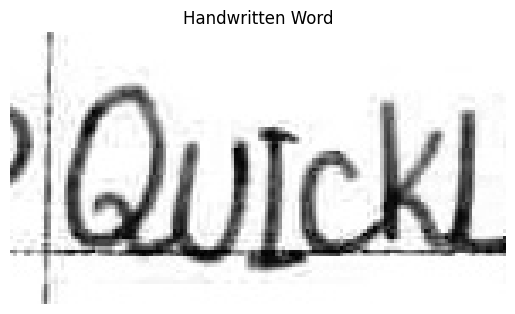

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Pick one random image-label pair
sample_path, label = random.choice(image_label_pairs)

# Load the image
image = Image.open(sample_path).convert("RGB")

# Show the label and image
print(f"🧾 Label (Ground Truth): {label}")

# Display the image
plt.imshow(image)
plt.axis("off")
plt.title("Handwritten Word")
plt.show()



In [ ]:
# -------------------------------------------------------
# Define Custom Dataset Class with Image Preprocessing
# -------------------------------------------------------
# This code defines a PyTorch Dataset for handwritten OCR training.
# It applies image transformations including resizing, converting to grayscale,
# and tensor conversion to prepare images for the TrOCR model.
# The dataset returns preprocessed image tensors along with their labels.


from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor, Grayscale
from torch.utils.data import Dataset

# Define image preprocessing steps
transform = Compose([
    Resize((384, 384)),
    Grayscale(num_output_channels=3),
    ToTensor()
])

# Dataset class for TrOCR
class HandwritingOCRDataset(Dataset):
    def __init__(self, image_label_pairs, transform=None):
        self.data = image_label_pairs
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Create dataset instance
dataset = HandwritingOCRDataset(image_label_pairs, transform=transform)


Label: jump


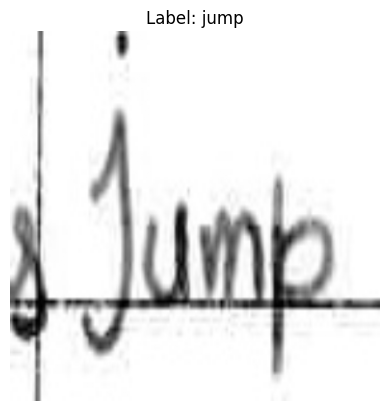

In [ ]:
# -----------------------------------------
# Visualize a Sample Image from the Dataset
# -----------------------------------------


import matplotlib.pyplot as plt

# Test one sample
sample_image, sample_label = dataset[0]
print("Label:", sample_label)
plt.imshow(sample_image.permute(1, 2, 0), cmap='gray')
plt.title(f"Label: {sample_label}")
plt.axis("off")
plt.show()


In [ ]:
# ----------------------------------------------------------
# Define Batch Preprocessing Function for Training
# ----------------------------------------------------------
# This function takes a batch of (image, text) pairs and prepares them for model input:
# - Encodes each image into pixel values using the TrOCR processor.
# - Encodes the corresponding text labels into token IDs, padding and truncating as needed.
# - Returns a dictionary with stacked tensors for 'pixel_values' and 'labels', ready for training.


from transformers import TrOCRProcessor
import torch

# Load TrOCR processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

# Preprocess function
def preprocess_batch(batch):
    pixel_values = []
    labels = []

    for image, text in batch:
        # Encode image
        encoded_img = processor(images=image, return_tensors="pt").pixel_values[0]
        pixel_values.append(encoded_img)

        # Encode label (text)
        with processor.as_target_processor():
            encoded_text = processor.tokenizer(text, padding="max_length", truncation=True, max_length=32).input_ids
        labels.append(torch.tensor(encoded_text))

    return {"pixel_values": torch.stack(pixel_values), "labels": torch.stack(labels)}


In [ ]:
# Use only 1000 images for faster training in Colab
small_dataset = [dataset[i] for i in range(1000)]

# Preprocess this batch
processed_data = preprocess_batch(small_dataset)


It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.
/usr/local/lib/python3.11/dist-packages/transformers/models/trocr/processing_trocr.py:131: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your images inputs, or in a separate call.
  warnings.warn(


In [ ]:
# -----------------------------------------
# Custom Dataset Class for Preprocessed Data
# -----------------------------------------
# This class wraps preprocessed pixel values and labels into a PyTorch Dataset,
# enabling easy indexing and use with DataLoader during training.
# Each item is returned as a dictionary with 'pixel_values' and 'labels' tensors.

class TrOCRDataset(torch.utils.data.Dataset):
    def __init__(self, processed_data):
        self.pixel_values = processed_data["pixel_values"]
        self.labels = processed_data["labels"]

    def __len__(self):
        return len(self.pixel_values)

    def __getitem__(self, idx):
        return {
            "pixel_values": self.pixel_values[idx],
            "labels": self.labels[idx]
        }

train_dataset = TrOCRDataset(processed_data)


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasmeet1311","key":"eb8fb3448d28a66e9c9e43ed08411105"}'}

In [ ]:
# ----------------------------------------
# Setup Kaggle API Credentials and Search Datasets
# ----------------------------------------
# This code creates the Kaggle configuration directory,
# copies the kaggle.json API token file into place with proper permissions,
# and runs a search for datasets related to "handwritten" using the Kaggle CLI.

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list -s handwritten



ref                                                       title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
dhruvildave/english-handwritten-characters-dataset        English Handwritten Characters                     13694607  2021-02-24 11:42:16.657000          15362        167  0.9411765        
divyanshrai/handwritten-signatures                        handwritten signatures                            388332310  2018-11-08 05:27:21.823000          11631        171  0.625            
xainano/handwrittenmathsymbols                            Handwritten math symbols dataset                  359466794  2017-01-15 17:58:48.007000          19857        411  0.75             
mloey1/ahcd1                                 

In [ ]:

# This class accepts a list of (image_path, label_text) pairs and applies:
# - Optional image transformations (e.g., resizing, normalization)
# - On-the-fly processing of images into pixel tensors using TrOCRProcessor
# - Tokenization and padding/truncation of label texts for training
# Each sample returns a dictionary with processed 'pixel_values' and 'labels' tensors.

from torch.utils.data import Dataset
from PIL import Image
from transformers import TrOCRProcessor
import os

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

class TrOCRDataset(Dataset):
    def __init__(self, image_label_pairs, transform=None, max_length=32):
        self.data = image_label_pairs
        self.transform = transform
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label_text = self.data[idx]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        # Process image
        pixel_values = processor(images=image, return_tensors="pt").pixel_values.squeeze()

        # Process text
        with processor.as_target_processor():
            labels = processor.tokenizer(label_text,
                                         padding="max_length",
                                         truncation=True,
                                         max_length=self.max_length,
                                         return_tensors="pt").input_ids.squeeze()

        return {
            "pixel_values": pixel_values,
            "labels": labels
        }


In [ ]:

# Custom Data Collator for TrOCR OCR Model Training

from transformers import default_data_collator

class DataCollatorForOCR:
    def __init__(self, processor):
        self.processor = processor

    def __call__(self, features):
        pixel_values = torch.stack([f["pixel_values"] for f in features])
        labels = [f["labels"] for f in features]

        # Pad labels with tokenizer.pad (returns dict including attention_mask)
        batch = self.processor.tokenizer.pad(
            {"input_ids": labels},
            padding=True,
            return_tensors="pt"
        )

        # Remove 'attention_mask' because ViTModel does not expect it
        batch.pop("attention_mask", None)

        batch["pixel_values"] = pixel_values
        batch["labels"] = batch["input_ids"]
        batch.pop("input_ids")

        return batch


In [ ]:
# Traininhg of the model


from transformers import VisionEncoderDecoderModel, Seq2SeqTrainer, Seq2SeqTrainingArguments

# Load model
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model.to("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Fix the pad_token_id issue
model.config.pad_token_id = processor.tokenizer.pad_token_id

# ✅ Optional but good: Set decoder_start_token_id
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id if processor.tokenizer.cls_token_id else processor.tokenizer.bos_token_id

# Training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./trocr-finetuned",
    per_device_train_batch_size=2,
    num_train_epochs=3,
    save_total_limit=1,
    logging_steps=10,
    predict_with_generate=True,
    fp16=torch.cuda.is_available()
)

# ✅ Fixed Data Collator (from earlier)
class DataCollatorForOCR:
    def __init__(self, processor):
        self.processor = processor

    def __call__(self, features):
        pixel_values = torch.stack([f["pixel_values"] for f in features])
        labels = [f["labels"] for f in features]

        batch = self.processor.tokenizer.pad(
            {"input_ids": labels},
            padding=True,
            return_tensors="pt"
        )

        batch.pop("attention_mask", None)  # ✅ Drop this for ViT encoder
        batch["pixel_values"] = pixel_values
        batch["labels"] = batch["input_ids"]
        batch.pop("input_ids")
        return batch

# Build the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # from earlier step
    tokenizer=processor.tokenizer,
    data_collator=DataCollatorForOCR(processor)
)

# ✅ Start training
trainer.train()


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

KeyboardInterrupt: 

In [ ]:
# Saving work of epoch1
model.save_pretrained("./trocr-finetuned-epoch1")
processor.save_pretrained("./trocr-finetuned-epoch1")

In [ ]:
# Saving work in drive

from google.colab import drive
drive.mount('/content/drive')

!cp -r ./trocr-finetuned-epoch1 /content/drive/MyDrive/
print("Model saved to Google Drive ✅")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat './trocr-finetuned-epoch1': No such file or directory
Model saved to Google Drive ✅


In [ ]:
from transformers import VisionEncoderDecoderModel, TrOCRProcessor

# Load model and processor from saved checkpoint
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/trocr-finetuned-epoch1")
processor = TrOCRProcessor.from_pretrained("/content/drive/MyDrive/trocr-finetuned-epoch1")

# Move to GPU
model.to("cuda" if torch.cuda.is_available() else "cpu")



Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (i

In [ ]:
!pip install -q evaluate
!pip install jiwer



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.8 MB/s eta 0:00:00


🧾 Ground Truth: boxing
🤖 Predicted:   QULYICK


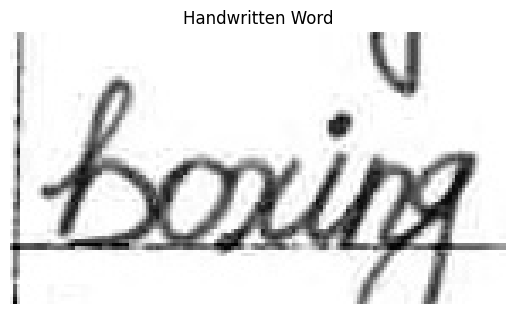

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Pick a random sample from the full dataset
sample_path, actual_label = random.choice(image_label_pairs)

# Load and process the image
image = Image.open(sample_path).convert("RGB")
pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(model.device)

# Generate prediction
generated_ids = model.generate(pixel_values)
predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Show result
print(f"🧾 Ground Truth: {actual_label}")
print(f"🤖 Predicted:   {predicted_text}")

# Display image
plt.imshow(image)
plt.axis("off")
plt.title("Handwritten Word")
plt.show()


In [ ]:
# Results

import evaluate
from PIL import Image

# Load CER and WER metrics
cer_metric = evaluate.load("cer")
wer_metric = evaluate.load("wer")

ground_truths = []
predictions = []

# Test on 100 images from your dataset
for img_path, label in image_label_pairs[:100]:  # You can increase to 200 or more
    try:
        image = Image.open(img_path).convert("RGB")
        pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(model.device)

        generated_ids = model.generate(pixel_values)
        predicted = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        ground_truths.append(label.lower())
        predictions.append(predicted.lower())

    except Exception as e:
        print(f"Skipped: {img_path}, error: {e}")
        continue

# Compute accuracy
cer = cer_metric.compute(predictions=predictions, references=ground_truths)
wer = wer_metric.compute(predictions=predictions, references=ground_truths)

# Show results
print(f"\n✅ Character Error Rate (CER): {cer:.2%}")
print(f"✅ Word Error Rate (WER): {wer:.2%}")




✅ Character Error Rate (CER): 150.00%
✅ Word Error Rate (WER): 100.00%
